# ELE 435-535 LAB 6

### Name: Zachary Hervieux-Moore
### Enrollment: 535

### Import Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
# Functions for packing and unpacking images
def packcw(A,nr,nc):
    x = (A.T).reshape(nr*nc,1)
    return x

def unpackcw(x,nr,nc):
    A = x.reshape(nc,nr)
    return A.T

def packrw(A,nr,nc):
    x = A.reshape(nr*nc,1)
    return x

def unpackrw(x,nr,nc):
    A = x.reshape(nr,nc)
    return A

### Load Data

In [3]:
# Load MNIST train and test data
train = np.load('MNISTcwtrain1000.npy')
train = train.astype(dtype='float64')/255.0
test = np.load('MNISTcwtest100.npy')
test = test.astype(dtype='float64')/255.0
# Images are normalized to [0,1]
size = train.shape[0]
n_train = train.shape[1]
n_test = test.shape[1]

print('-----MNIST Dataset Loaded-----')
print('Train Data: {} x {}'.format(size, n_train))
print('Test Data: {} x {}'.format(size, n_test))

-----MNIST Dataset Loaded-----
Train Data: 784 x 10000
Test Data: 784 x 1000


## Minimum MSE Estimation of Hidden Data

1.Compute the mean and the covariance matrix of the training data.

In [4]:
mu = np.mean(train, axis=1)
sigma = np.cov(train)

### Right half hidden

2.Implement a function to hide the right half of the image (Fill 14 columns on the right with black). (Hint: Find the indices of the hidden area) 

In [5]:
# takes in a flattened image

def hide_img(img, mask):
    img[mask] = 0
    return img

3.Find the minimum MSE estimator $W^*$ (Note: It is recommended to implement it as a function because you will need it again for questions below).

Full images of the training data are available. If you refer to the notes, $X$ can be considered as the given region of the image and $Y$ can be considered as the hidden region. Mean and covariance of the training data can be divided according to the indices of given and hidden pixels.

In [6]:
# Example function
def Wstar_miss(sigma, mask):
    X_indices = np.where(mask == 0)[0]
    Y_indices = np.where(mask == 1)[0]
    
    # Must slice in two different steps
    sigma_X = sigma[X_indices, :]
    sigma_X = sigma_X[:, X_indices]
     
    sigma_XY = sigma[X_indices, :]
    sigma_XY = sigma_XY[:, Y_indices]
    
    Wstar = np.linalg.pinv(sigma_X) @ sigma_XY
    return Wstar

4.Using the estimator, approximate the right half of the hidden image. Choose any 5 images in the test data and display the 1)original image, 2)hidden image, and 3)approximated image. Calculate the mean squared error for each example.

MSE for image 51 is 0.019540246503767948
MSE for image 151 is 0.01558441153362075
MSE for image 764 is 0.01837411342582232
MSE for image 888 is 0.028452277630281114
MSE for image 911 is 0.02945780359617823


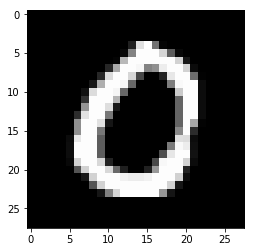

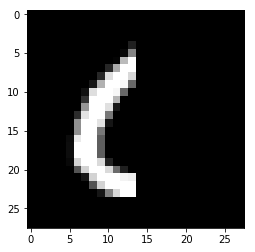

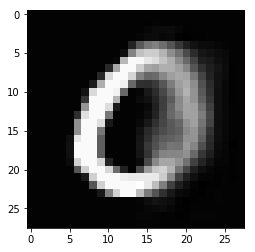

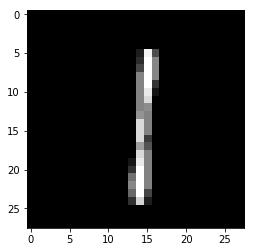

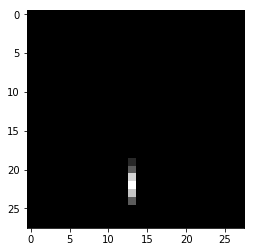

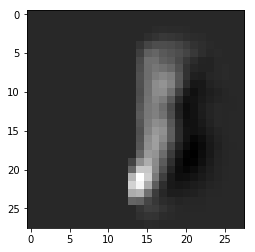

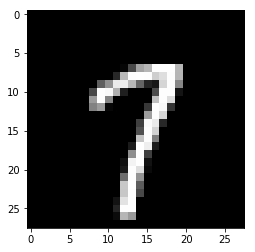

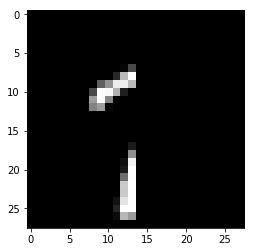

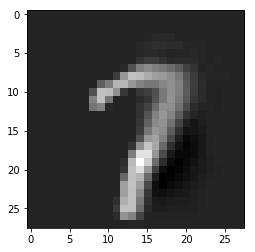

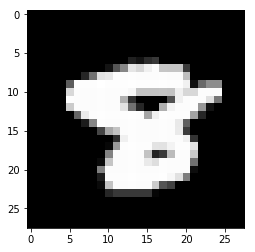

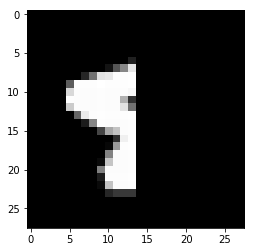

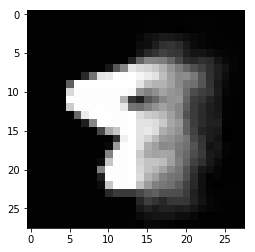

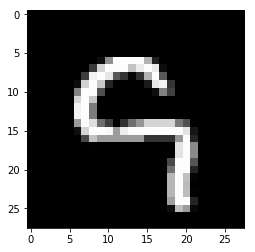

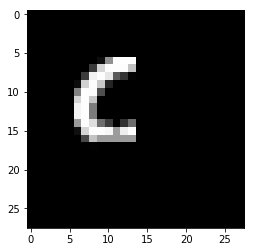

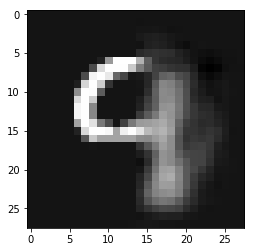

<Figure size 432x288 with 0 Axes>

In [7]:
images = [51, 151, 764, 888, 911]

for image in images:
    orig = test[:,image]
    img = np.copy(orig)
    mask = np.zeros_like(img, dtype='bool')
    mask[28*14-1:-1] = True
    x = img[~mask]
    y = img[mask]

    plt.imshow(unpackcw(img, 28, 28), cmap='gray')
    plt.figure()

    plt.imshow(unpackcw(hide_img(np.copy(img), mask), 28, 28), cmap='gray')
    plt.figure()

    img[mask] = Wstar_miss(sigma, mask).T @ (x - mu[~mask]) + mu[mask]
    plt.imshow(unpackcw(np.copy(img), 28, 28), cmap='gray')
    plt.figure()
    
    mse = np.mean((orig - img)**2)
    print('MSE for image {} is {}'.format(image, mse))

5.Hide different amount of area (hide 0~28 columns) then compute the MSE for each approximated image (Use the first test image). Plot the MSE versus number of columns hidden.

<Figure size 432x288 with 0 Axes>

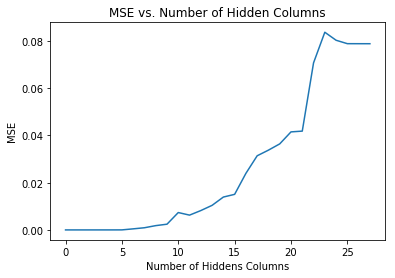

<Figure size 432x288 with 0 Axes>

In [8]:
MSE = []

for num_hidden_cols in range(28):
    orig = test[:,0]
    img = np.copy(orig)
    mask = np.zeros_like(img, dtype='bool')
    mask[0:28*num_hidden_cols] = True
    x = img[~mask]
    y = img[mask]
    img[mask] = Wstar_miss(sigma, mask).T @ (x - mu[~mask]) + mu[mask]
    MSE.append(np.mean((orig - img)**2))
    
plt.plot(MSE)
plt.title('MSE vs. Number of Hidden Columns')
plt.xlabel('Number of Hiddens Columns')
plt.ylabel('MSE')
plt.figure()


### Center hidden

6.Implement a function to hide the center of the image (Fill 8x8 square in the center with black). (Hint: Find the indices of the hidden area) 

In [9]:
img = np.copy(train[:,0])
mask = np.zeros_like(img, dtype='bool')
mask = unpackcw(mask, 28, 28)
mask[11:19, 11:19] = True
mask = packcw(mask, 28, 28)[:,0]

hide_middle = lambda img: hide_img(img, mask)

7.Find the minimum MSE estimator $W^*$.

In [10]:
W_star = Wstar_miss(sigma, mask)

8.Using the estimator, approximate the center of the hidden image. Choose any 5 images in the test data and display the 1)original image, 2)hidden image, and 3)approximated image. Calculate the MSE for each example.

MSE for image 51 is 0.002060786372919906
MSE for image 151 is 0.003428025584124145
MSE for image 764 is 0.0036563948902220344
MSE for image 888 is 0.015409917705055981
MSE for image 911 is 0.0048789561834263265


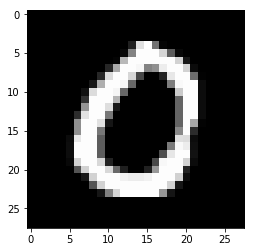

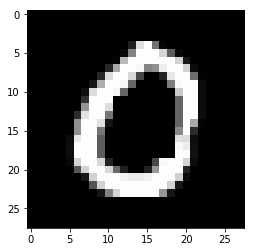

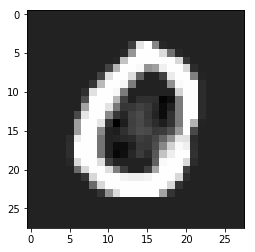

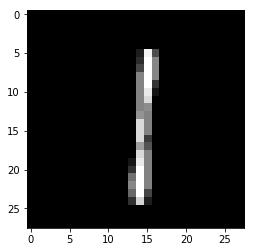

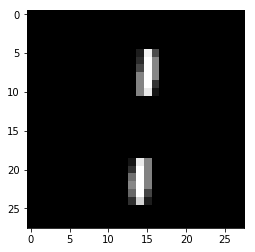

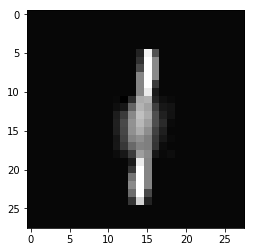

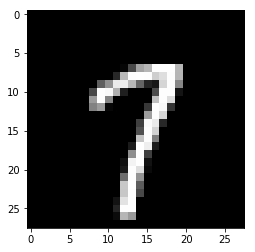

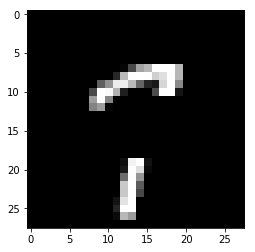

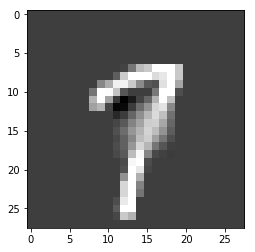

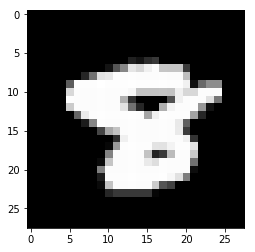

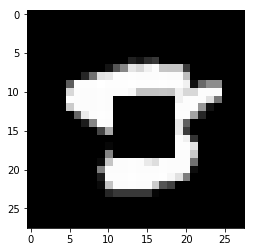

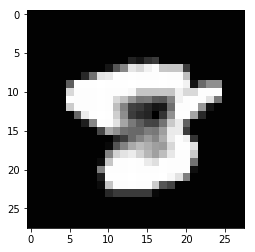

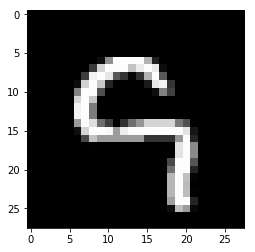

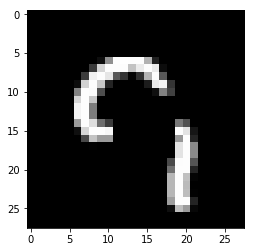

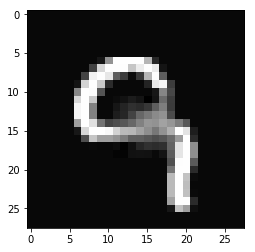

<Figure size 432x288 with 0 Axes>

In [11]:
images = [51, 151, 764, 888, 911]

for image in images:
    orig = test[:,image]
    img = np.copy(orig)
    x = img[~mask]
    y = img[mask]

    plt.imshow(unpackcw(img, 28, 28), cmap='gray')
    plt.figure()

    plt.imshow(unpackcw(hide_middle(np.copy(img)), 28, 28), cmap='gray')
    plt.figure()

    img[mask] = W_star.T @ (x - mu[~mask]) + mu[mask]
    plt.imshow(unpackcw(np.copy(img), 28, 28), cmap='gray')
    plt.figure()
    
    mse = np.mean((orig - img)**2)
    print('MSE for image {} is {}'.format(image, mse))

9.Use the least square method to approximate the center pixels for same images in question 8. 

\begin{equation}
\arg \min_{W\in\mathbb{R}^{64x(784-64)}} \sum_{i=1}^{n}\|y_i-W x_i\|_2^2
\end{equation}
\begin{equation}
y_i \in \mathbb{R}^{64}, \hspace{5mm} x_i \in \mathbb{R}^{(784-64)}
\end{equation}

$y_i$ is the vector of 64 hidden pixels, $x_i$ is the rest of the pixels given, and $n$ is the total number of samples for the digit.

Calculate the MSE for each example (for the same images).

MSE for image 51 is 0.0018068893656884783
MSE for image 151 is 0.002322004289869028
MSE for image 764 is 0.0033652793957110344
MSE for image 888 is 0.013670064477666255
MSE for image 911 is 0.005386110938910814


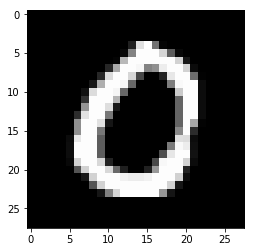

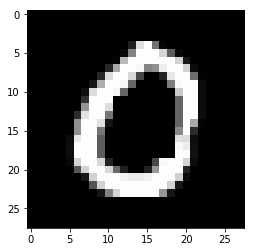

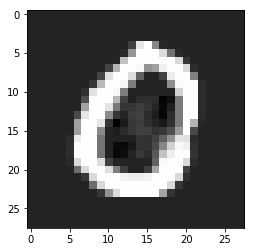

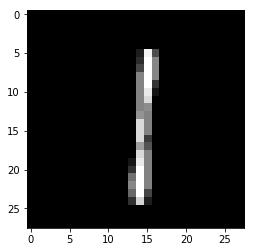

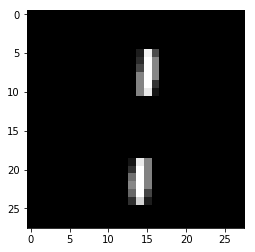

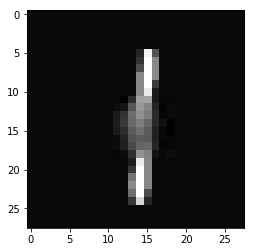

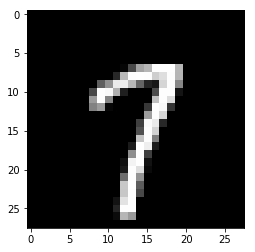

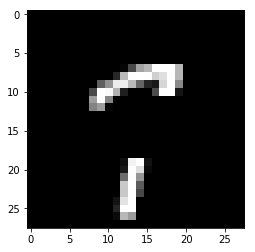

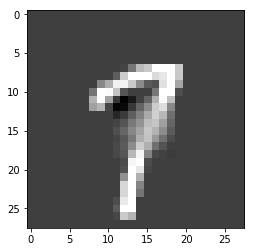

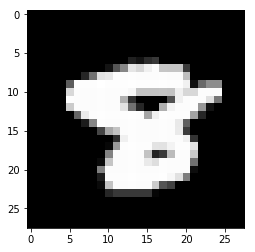

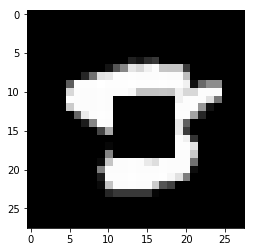

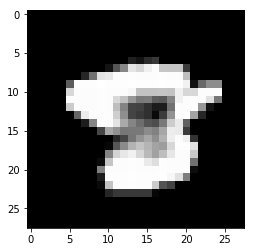

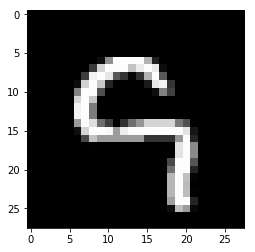

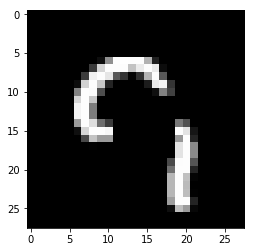

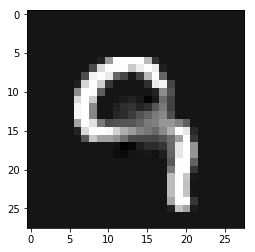

<Figure size 432x288 with 0 Axes>

In [12]:
images = [51, 151, 764, 888, 911]

mask = np.zeros_like(img, dtype='bool')
mask = unpackcw(mask, 28, 28)
mask[11:19, 11:19] = True
mask = packcw(mask, 28, 28)[:,0]

X = train[~mask, :]
Y = train[mask, :]

W_ols = np.linalg.pinv(X @ X.T) @ X @ Y.T

for image in images:
    orig = test[:,image]
    img = np.copy(orig)
    x = img[~mask]
    y = img[mask]

    plt.imshow(unpackcw(img, 28, 28), cmap='gray')
    plt.figure()

    plt.imshow(unpackcw(hide_middle(np.copy(img)), 28, 28), cmap='gray')
    plt.figure()

    img[mask] = W_ols.T @ x
    plt.imshow(unpackcw(np.copy(img), 28, 28), cmap='gray')
    plt.figure()
    
    mse = np.mean((orig - img)**2)
    print('MSE for image {} is {}'.format(image, mse))

10.Suppose you have a test data with hidden centers (8x8 square). Approximate the hidden area of each image then use the nearest class mean classifier to classify the test data. Compare the accuracy with the experiment from HW1, which had an accuracy of 76.7%.

In [13]:
means = []

for i in range(10):
    means.append(np.mean(train[:, i*1000:(i+1)*1000], axis=1))
      
num_correct_mse = 0
num_correct_ols = 0
num_samples = test.shape[1]

mask = np.zeros_like(img, dtype='bool')
mask = unpackcw(mask, 28, 28)
mask[11:19, 11:19] = True
mask = packcw(mask, 28, 28)[:,0]

Wstar = Wstar_miss(sigma, mask)

X = train[~mask, :]
Y = train[mask, :]

W_ols = np.linalg.pinv(X @ X.T) @ X @ Y.T

for i in range(num_samples):
    img = np.copy(test[:,i])
    x = img[~mask]
    y = img[mask]
    
    # MSE
    img[mask] = Wstar.T @ (x - mu[~mask]) + mu[mask]

    nn_class = 0
    nn_error = np.linalg.norm(img - means[0])
    
    for j in range(1, len(means)):
        if nn_error > np.linalg.norm(img - means[j]):
            nn_class = j
            nn_error = np.linalg.norm(img - means[j])

    if i // 100 == nn_class:
        num_correct_mse += 1
    
    # OLS
    img[mask] = W_ols.T @ x

    nn_class = 0
    nn_error = np.linalg.norm(img - means[0])
    
    for j in range(1, len(means)):
        if nn_error > np.linalg.norm(img - means[j]):
            nn_class = j
            nn_error = np.linalg.norm(img - means[j])

    if i // 100 == nn_class:
        num_correct_ols += 1
                
print('Accuracy is {} using MSE and {} using OLS'.format(num_correct_mse/num_samples, num_correct_ols/num_samples))
    

Accuracy is 0.708 using MSE and 0.719 using OLS


11.Try changing the hidden area (4x4,8x8,12x12,16x16,20x20) and check the accuracy of the classificaiton using the nearest class mean classifier. Plot the accuracy versus hidden area.

<Figure size 432x288 with 0 Axes>

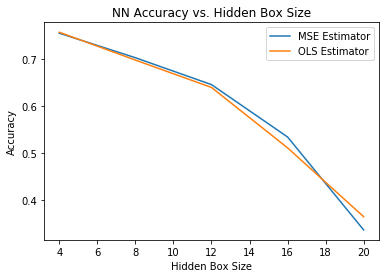

<Figure size 432x288 with 0 Axes>

In [25]:
means = []

for i in range(10):
    means.append(np.mean(train[:, i*1000:(i+1)*1000], axis=1))
    
accuracy_mse = []
accuracy_ols = []

for box_size in range(4, 21, 4):
    num_correct_mse = 0
    num_correct_ols = 0
    num_samples = test.shape[1]

    mask = np.zeros_like(img, dtype='bool')
    mask = unpackcw(mask, 28, 28)
    mask[(28-box_size)//2:(28+box_size)//2, (28-box_size)//2:(28+box_size)//2] = True
    mask = packcw(mask, 28, 28)[:,0]

    Wstar = Wstar_miss(sigma, mask)

    X = train[~mask, :]
    Y = train[mask, :]

    W_ols = np.linalg.pinv(X @ X.T) @ X @ Y.T

    for i in range(num_samples):
        img = np.copy(test[:,i])
        x = img[~mask]
        y = img[mask]

        # MSE
        img[mask] = Wstar.T @ (x - mu[~mask]) + mu[mask]

        nn_class = 0
        nn_error = np.linalg.norm(img - means[0])

        for j in range(1, len(means)):
            if nn_error > np.linalg.norm(img - means[j]):
                nn_class = j
                nn_error = np.linalg.norm(img - means[j])

        if i // 100 == nn_class:
            num_correct_mse += 1

        # OLS
        img[mask] = W_ols.T @ x

        nn_class = 0
        nn_error = np.linalg.norm(img - means[0])

        for j in range(1, len(means)):
            if nn_error > np.linalg.norm(img - means[j]):
                nn_class = j
                nn_error = np.linalg.norm(img - means[j])

        if i // 100 == nn_class:
            num_correct_ols += 1

    accuracy_mse.append(num_correct_mse/num_samples)
    accuracy_ols.append(num_correct_ols/num_samples)
    
plt.plot(range(4, 21, 4), accuracy_mse, label='MSE Estimator')
plt.plot(range(4, 21, 4), accuracy_ols, label='OLS Estimator')
plt.title('NN Accuracy vs. Hidden Box Size')
plt.xlabel('Hidden Box Size')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()